# Project 1

### Goal
The overaching goal of this assignment to ensure that the conda environment for this course was created correctly and introduce you to the format of project assignments. There are three tasks to achieve this. These will be demarcated by markdown cells with titles starting with 'Task 1: ...', 'Task 2: ...', etc. First, you need to setup the conda environment for this course to run this notebook. If you encounter any errors during that process, they can either be solved on your own or by meeting me for office hours. Second, I will introduce you to how code should be formatted for projects in this course. This will be a series of python cells that you must run to achieve the task specified in the corresponding markdown cell. Third, you will explore the properties of extracellular recordings using the code we developed in the lectures during Week 1.

**To get credit for an assignment, each cell of python code must run without errors (but warnings are allowed).**

### Task 1: Test that our conda environment was created successfully.

Before running this task, you should ensure that the *decode_brain* environment has been created and you have opened this Jupyter notebook in that environment. The instructions to do all this are:
1. If you haven't already, download and install [Anaconda](https://www.anaconda.com/download) for managing python environments.
2. Download course repository. On the [course github page](https://github.com/dbheadley/DecodingTheBrain), click the green *Code* button near the top right of the page. On the drop down menu, click the *Download Zip* button. Unzip the repository wherever you normally store your code.
3. Open the command terminal. On a Windows computer search for the Anaconda Prompt application and open it. If you are using a Mac/Linux use the 'Terminal' app.
4. In the terminal, navigate to the course repository directory by typing `cd FULLPATH`, where FULLPATH is the complete path to the course directory. 
5. To create the environment, enter the command `conda env create -f environment.yml`
6. Once that has run, you can start using the environment by typing `conda activate decode_brain`
7. Now that you are in the environment, we can start coding using Jupyter notebooks. To do this, enter the command `jupyter notebook`

Once you have loaded this notebook in the *decode_brain* environment, the following python cell of import statements should be able to run without throwing any errors.

In [1]:
import os
import sys
sys.path.append('../..')

import pickle
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from IPython.display import display, Math, Latex    
import sklearn
import torch
from nilearn import plotting
from nimare import utils
import source

### Task 2: Determine how membrane resistance impacts synaptic integration

In the lecture we saw how changing the value of the leak conductance affected the membrane time constant. The membrane time constant is a function of the membrane capacitance multiplied by the membrane resistance (which was the inverse of the leak conductance). Lowering the resistance sped up the membrane response to an injected current, while raising the resistance slowed down the response. To refresh your memory, reread section *Passive electrical model of the membrane* from Week 1. 

Here we will use our `SynapticNeuron` class and `spk_train` function to examine how leak conductance impacts the integration of pairs of synaptic inputs. I will code this example, demonstrating how to import code from the lectures, run some analyses, and then plot the results.

In [2]:
# Import the code we need from the Week 1 lecture
from source.neuron_sim import SynapticNeuron, spk_train

# Declare any constants required for the code
sim_dur = 1 # sec
sim_dt = 0.0001 # sec

In [3]:
# Initialize simulation parameters and objects
nrn = SynapticNeuron()
spk_isis = [0.1, 0.15, 0.4, 0.425, 0.7, 0.71] # times between spikes
t = nrn.get_t_vec(dur=sim_dur, dt=sim_dt) # list of time points

# Create a list of membrane resistances
rm_list = [10, 25, 50]

# create spike train
prespks = spk_train(t, spk_isis)

In [ ]:
# Initialize lists for storing simulation results
rec_v = []
rec_i = []

# Run a simulation for each membrane resistance value specified in the rm_list list
for rm in rm_list:
    nrn = SynapticNeuron(r_m = rm)
    v, i = nrn.run(dur=sim_dur, dt=sim_dt, inp=0, prespk=prespks)
    rec_v.append(v)
    rec_i.append(i)

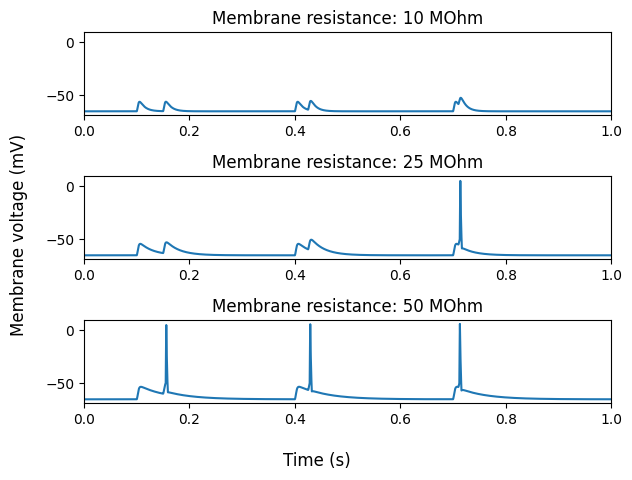

In [9]:
# Plot the results
fig, ax = plt.subplots(3, 1, sharey=True)
for i in range(3):
    ax[i].plot(t, rec_v[i])
    ax[i].set_title('Membrane resistance: {} MOhm'.format(rm_list[i]))
    ax[i].set_xlim(0, sim_dur)

fig.supxlabel('Time (s)')
fig.supylabel('Membrane voltage (mV)')
fig.tight_layout()

Once an analysis is completed, we describe the results. 
In this case, lowering the membrane resistance makes the membrane respond faster to synaptic inputs. At the lowest resistance (10 MOhm), each synaptic input produces a short lasting depolarization of the membrane. These are so short that even if two synaptic activations happen 10 ms apart (last pair of presynaptic spikes), they are not long enough to add together such that the neuron's threshold for triggering an action potential is reached. As we increase the membrane resistance to its standard value (25 MOhm), synaptic activations last longer. This lengthening allows pairs of synaptic activations within 10 ms of each other to summate such that the action potential threshold is crossed and a spike is produced. Further increasing the membrane resistance (50 MOhm) slows down the synaptic response so much that even pairs of synaptic inputs that are 50 ms apart can add together to drive an action potential. Thus, increasing membrane resistance slows the membrane response to synaptic inputs and allows neurons to fire in response to synaptic inputs that are spread out in time.

### Task 3: Factors affecting extracellular recordings
In the lecture we saw how to simulate the signals picked up by recording electrodes. As we varied the distance between the electrode and a sheet of neurons, we found that the types of signals we could record changed. However, we did not explore how other factors impacted this relationship. These are the size of the neuronal sheet, density of neurons, or conductivity of the extracellular space. 

For this task, you will use the `ExtracellRec` class to simulate an extracellular recording while varying one of these three factors. Conviently, each of these factors is an input argument to that function:
1. size of the sheet of neurons = `radius` (default = 2 cm)
2. density of neurons = `density` (default = 1000 neurons/cm^2)
3. extracellular conductivity = `extra_cond` (default = 0.3 S/m)

Just as in Task 2, you will import the class from our source code and then choose a single parameter to vary. For the one you choose, you will try three different values, with the first being smaller than the default value, the second being the default, and the third by larger than the default. After running the simulations, you will plot the results, then describe them and give a brief interpretation of what they say about how your factor contributes to the events present (evoked potential and spiking) in the extracellular signal. You should refer to the section *Modeling relationship between electrode distance and recorded potential* to guide how you use the `ExtracellRec` class and plot your results.

In [ ]:
# Import class and initialize simulation constants

In [ ]:
# Run simulations

In [ ]:
# Visualize simulation results

*Describe your results here*